# 실습코드(미세먼지 데이터)

- 에어코리아에 접속해서 2019년 4월의 전국 단위 미세먼지 측정치를 다운로드합니다.
- 다운로드 파일은 미리 올려드렸으니 'Y2019Q4' 파일을 로드하여 실습해봅시다!

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [0]:
import numpy as np
import pandas as pd

df= pd.read_csv("Y2019Q4.csv", header=0, engine='python', encoding='CP949')

In [0]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [0]:
#df의 전체적인 정보를 조회해봅시다
df.shape

(314339, 12)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314339 entries, 0 to 314338
Data columns (total 12 columns):
지역       314339 non-null object
망        314339 non-null object
측정소코드    314339 non-null int64
측정소명     314339 non-null object
측정일시     314339 non-null int64
SO2      301514 non-null float64
CO       300889 non-null float64
O3       302759 non-null float64
NO2      304334 non-null float64
PM10     302581 non-null float64
PM25     283965 non-null float64
주소       314339 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 28.8+ MB


In [0]:
#실전에서 칼럼네임이 한글이면 깨지는 경우가 많습니다. 영어로 변경해봅시다
df=df.rename(index=str, columns={'지역':"SGG","측정소코드":"id","측정소명":"id_name","측정일시":"date","주소":"add"})
df.head()

,SGG,망,id,id_name,date,SO2,CO,O3,NO2,PM10,PM25,add
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [0]:
#필요한 컬럼들만 뽑아냅시다(참고: PM10은 미세먼지, PM25는 초미세먼지를 의미)
cols=['SGG','id','date','SO2','CO','PM10','PM25']
df2=df[cols]
df2.tail()

,SGG,id,date,SO2,CO,PM10,PM25
314334,인천 옹진군,831492,2019043020,0.0017,0.2,16.0,12.0
314335,인천 옹진군,831492,2019043021,0.0013,0.2,19.0,10.0
314336,인천 옹진군,831492,2019043022,0.0012,0.2,21.0,9.0
314337,인천 옹진군,831492,2019043023,0.0010,0.2,21.0,15.0
314338,인천 옹진군,831492,2019043024,0.0010,0.2,22.0,11.0


In [0]:
#'date' 칼럼의 타입을 datetime으로 설정하고, 이를 인덱스로 설정해봅시다.
##'date'를 연-월-일 형식으로 바꿔봅시다. 마지막 2자리는 제외(마지막 2자리는 hour)
s_date=df2.date.astype(str)
s_date2=s_date.str[:-2]
df2['DATE']=pd.to_datetime(s_date2)
df2.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SGG,id,date,SO2,CO,PM10,PM25,DATE
0,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,2019-04-01
1,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,2019-04-01
2,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,2019-04-01
3,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,2019-04-01
4,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,2019-04-01


In [0]:
print(df2.DATE.dtypes)

datetime64[ns]


In [0]:
df2.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '314329', '314330', '314331', '314332', '314333', '314334', '314335',
       '314336', '314337', '314338'],
      dtype='object', length=314339)

In [0]:
df2=df2.set_index('DATE')
df2.head()

,SGG,id,date,SO2,CO,PM10,PM25
DATE,,,,,,,
2019-04-01,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0
2019-04-01,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0
2019-04-01,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0
2019-04-01,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0
2019-04-01,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0


In [0]:
df2.index

DatetimeIndex(['2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
               '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
               '2019-04-01', '2019-04-01',
               ...
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30'],
              dtype='datetime64[ns]', name='DATE', length=314339, freq=None)

In [0]:
#'date'컬럼 드롭
#df2=df2.drop('date',axis=1)
df2.head()

,SGG,id,date,SO2,CO,PM10,PM25
DATE,,,,,,,
2019-04-01,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0
2019-04-01,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0
2019-04-01,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0
2019-04-01,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0
2019-04-01,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0


In [0]:
#새로운 칼럼인 'SIDO'를 만들어봅시다
df2['SIDO']=df2['SGG'].str[0:2] #참고) df2['SIDO'] = df2['SGG'].str.split(' ')[0]
df2.head()

,SGG,id,date,SO2,CO,PM10,PM25,SIDO
DATE,,,,,,,,
2019-04-01,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,서울
2019-04-01,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,서울
2019-04-01,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,서울
2019-04-01,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,서울
2019-04-01,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,서울


In [0]:
#시도별 하루 초미세먼지의 평균을 구해봅시다
daily_mean=df2.groupby(['SIDO','DATE'])['PM25'].mean()
daily_mean.head(10)

SIDO  DATE      
강원    2019-04-01    17.067941
      2019-04-02    15.893082
      2019-04-03    19.614256
      2019-04-04    23.418860
      2019-04-05    24.406181
      2019-04-06    14.756250
      2019-04-07    13.703158
      2019-04-08    12.529412
      2019-04-09     9.227700
      2019-04-10     3.550898
Name: PM25, dtype: float64

In [0]:
#보기 쉽게, stack 메서드를 이용하여 표로 정리해봅시다(date/SIDO)
daily_mean2=daily_mean.unstack(level=0)
daily_mean2.head()

SIDO,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
DATE,,,,,,,,,,,,,,,,,
2019-04-01,17.067941,11.882521,11.736349,12.011905,10.507463,13.453333,11.235915,16.206406,12.218317,11.159574,12.423174,10.416136,9.448519,12.346975,11.962406,12.056061,14.772009
2019-04-02,15.893082,17.141889,13.584252,14.985981,17.039604,16.714660,14.191638,17.924429,16.965480,15.656250,16.115183,15.506383,14.303073,17.878472,21.302817,17.057269,21.241935
2019-04-03,19.614256,21.720133,14.018809,16.498818,17.114833,18.785340,18.409722,19.128521,22.645678,19.787234,18.025381,20.257732,14.295518,21.930070,11.616000,21.135521,23.615556
2019-04-04,23.418860,20.756563,18.759812,19.306977,26.160000,20.524804,21.125000,23.071304,20.144989,23.625000,21.713217,17.896000,18.571622,24.729965,12.298611,20.541007,27.035398
2019-04-05,24.406181,23.270219,26.727129,27.344340,31.466981,27.894309,27.947552,33.141361,24.087645,24.631579,32.083538,19.928571,30.678378,33.229021,40.812500,25.824561,28.355705


# Quest

### 1. 로드한 'df2'데이터프레임에는 결측치가 상당수 포함되어 있습니다. 
결측치를 확인하는 코드를 이용하여, 어떤 칼럼에 결측치가 얼마나 있는지 파악해보세요.
그리고, 'SO2','CO' 컬럼의 결측치는 그것의 평균값으로 채우고,
'PM10','PM25' 컬럼의 결측치는 모두 삭제하는 코드를 작성해주세요.

In [0]:
#일단 인덱스 reset해줌
df2=df2.reset_index()

In [0]:
# column별 결측치 파악
df2.isnull().sum()

DATE        0
SGG         0
id          0
date        0
SO2     12825
CO      13450
PM10    11758
PM25    30374
SIDO        0
dtype: int64

In [0]:
#SO2','CO' 컬럼의 결측치는 그것의 평균값으로 채우기
df2['SO2']=df2['SO2'].fillna(df2['SO2'].mean())
df2['CO']=df2['CO'].fillna(df2['CO'].mean())

In [0]:
# SO2 잘 채워졌는지 확인-> 결측값 ==0
print('SO2 결측치:', df2['SO2'].isnull().sum())
print('CO 결측치:', df2['CO'].isnull().sum())

SO2 결측치: 0
CO 결측치: 0


In [0]:
len(df2)

314339

In [0]:
#'PM10','PM25' 컬럼의 결측치는 모두 삭제
df2=df2.dropna(subset=['PM10','PM25'])
len(df2)

280788

In [0]:
#결측치 잘 제거했는지 확인
df2.isnull().sum()

DATE    0
SGG     0
id      0
date    0
SO2     0
CO      0
PM10    0
PM25    0
SIDO    0
dtype: int64

### 2. df2의 'date' 칼럼은 '2018030509'와 같이 '연+월+일+시'로 되어 있습니다.
우리는 여기서 연+월+일만 슬라이싱해 datetime형태로 DATE를 다시 정의했었죠?(ex. 2018-03-05)
마찬가지로, 이번엔 '시'만 슬라이싱해 df2의 새로운 칼럼인 'hour' 칼럼을 만들어주세요.(ex. 09)

In [0]:
df2['date'].dtypes

dtype('int64')

In [0]:
df2['hour']=df2['date'].astype(str).str[-2:]

In [0]:
df2.drop(['date'], axis=1, inplace=True)

In [0]:
df2.head()

,DATE,SGG,id,SO2,CO,PM10,PM25,SIDO,hour
0,2019-04-01,서울 중구,111121,0.002,0.4,27.0,16.0,서울,01
1,2019-04-01,서울 중구,111121,0.003,0.4,25.0,15.0,서울,02
2,2019-04-01,서울 중구,111121,0.003,0.4,23.0,13.0,서울,03
3,2019-04-01,서울 중구,111121,0.002,0.5,22.0,12.0,서울,04
4,2019-04-01,서울 중구,111121,0.002,0.4,23.0,12.0,서울,05


### 3. 미세먼지가 나쁜 기준은 초미세먼지('PM25')가 35보다 크면 '나쁨'으로 분류한다고 합니다.
불린 인덱싱과, 위의 2번에서 만든 'hour' 칼럼을 이용하여, 
시군구(SGG)별로 PM25가 35보다 큰 시간들을 카운트하고,
초미세먼지가 35보다 큰 개수가 많은 시군구와 그 시간대가 언제인지 sorting하여 구해주세요.

## 1) SGG 전처리

In [0]:
#인천 연수구\r\n , 인천 연수구  --> 이런 칼럼들이 있음!!
rn_list=[]
for s in df2['SGG'].unique():
    if '\r\n' in s:
        rn_list.append(s)
rn_list

['충남 당진시\r\n', '인천 서구\r\n', '인천 연수구\r\n']

In [0]:
for rn in rn_list: # 뒤에 \r\n이 붙어있는 애들 리스트
    for s in df2['SGG'].unique():
        if rn[:-2] in s and len(s)== len(rn[:-2]): #뒤에 \r\n 을 빼고 슬라이싱 한 애가 df2['SGG']에 있니? & 걔 자릿수도 고려
            print(rn, s)

인천 서구
 인천 서구
인천 연수구
 인천 연수구


In [0]:
df2['SGG']=df2['SGG'].apply(lambda row: row.replace('\r\n','')) #\r\n을 제거해주고 id (측정소코드)는 안맞춰줘도 될듯?

In [0]:
df2['id'].nunique()

409

In [0]:
df2['SGG'].nunique()

208

In [0]:
#\r\n 없어졌나 확인
rn_list=[]
for s in df2['SGG'].unique():
    if '\r\n' in s:
        rn_list.append(s)
rn_list # 없어졌다~

[]

## 2) 시군구 별로 미세먼지가 나쁜 시간대 확인

In [0]:
#시군구(SGG)별로 PM25가 35보다 큰 시간들을 카운트하고
df3=df2.loc[df2['PM25']>35].groupby(['SGG','hour']).count()['DATE'].reset_index()
df3.rename(columns={'DATE':'count'}, inplace=True)
df3=df3.sort_values(by='count', ascending=False)
df3.head()

,SGG,hour,count
484,경기 부천시,09,68
485,경기 부천시,10,68
483,경기 부천시,08,61
4460,충북 청주시,10,55
486,경기 부천시,11,54


## 2)-(1) 미세먼지가 나쁜 시간대 개수가 많은 시군구 찾기
- 초미세먼지가 35보다 큰 개수가 '많은' 시군구 
- 어디서 잘라야할까? 어디부터 많다고 할 수 있을지 고민,,,
- 자를 기준: count의 분포, boxplot

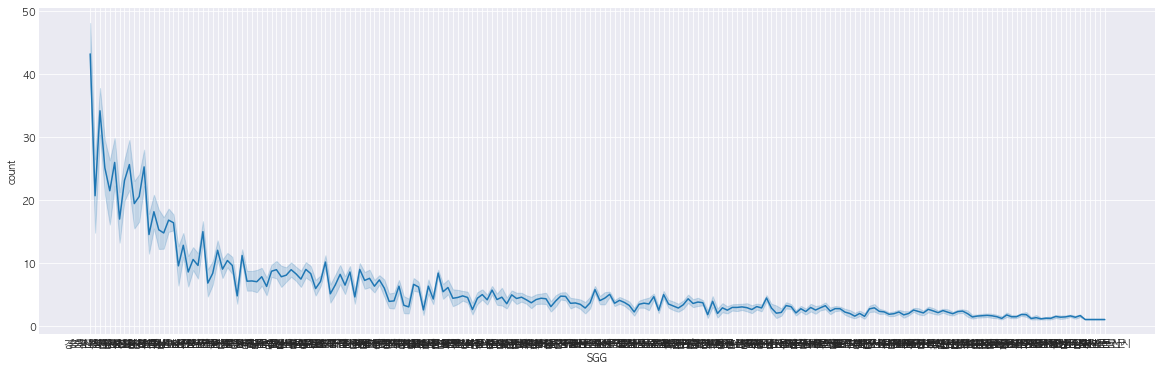

In [0]:
#count 분포를 보자
data=df3
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x='SGG',y='count',data=data, sort=False)
#count =10 에서 꺾인다-> count>10 인 애들을 '많다'라고 생각!

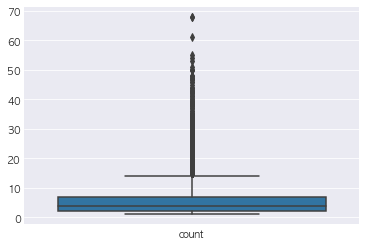

In [0]:
#2) 박스플랏으로 확인
sns.boxplot(data=data[['SGG','count']])
#20이상부터 최댓값(upper whisker)

### count의 lineplot, boxplot 확인 후, count>20인 애들을 '많다' 고 생각할 수 있다 
- 이런 애들만 따로 떼어서 플랏해보자

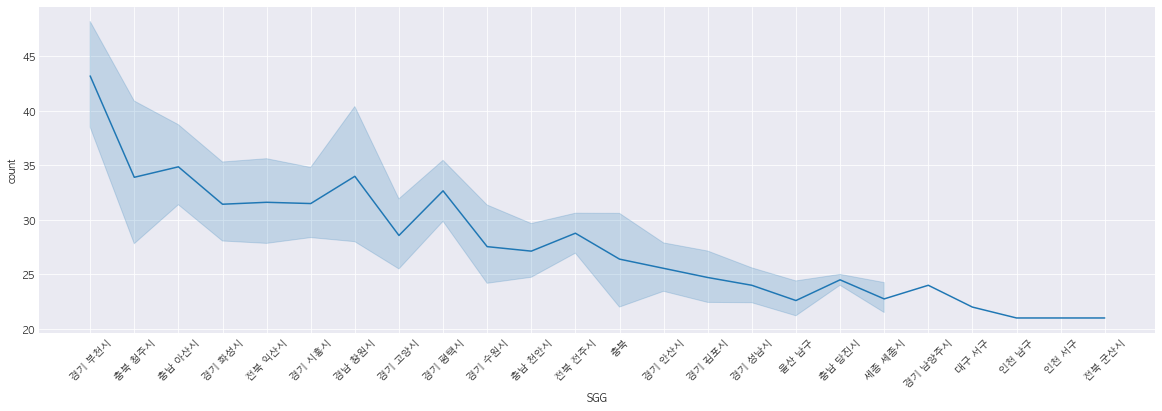

In [0]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x='SGG',y='count',data=df3.loc[df3['count']>20], sort=False)
plt.xticks(fontsize=10, rotation=45)
plt.show()

### * 미세먼지가 나쁜 지역들이 어떤 도/ 광역시에 속하는지 보고싶다

In [0]:
# 미세먼지 나쁜 지역 그룹
df3.loc[df3['count']>20]['SGG'].apply(lambda row: row[:2]).unique()

array(['경기', '충북', '충남', '전북', '경남', '울산', '세종', '대구', '인천'], dtype=object)

In [0]:
#도/ 광역시를 따로 칼럼으로 만들기-> 그룹화 하려고
df3['도/광역시']=df3.loc[df3['count']>20]['SGG'].apply(lambda row: row[:2])

In [0]:
df3.groupby(['도/광역시','SGG']
            , as_index=False).count().groupby('도/광역시').count().sort_values(by='SGG'
                                                                           , ascending=False)
#미세먼지를 많이 배출하는 SGG 중, 경기도에 위치하는 SGG가 제일 많다

,SGG,hour,count
도/광역시,,,
경기,10,10,10
전북,3,3,3
충남,3,3,3
인천,2,2,2
충북,2,2,2
경남,1,1,1
대구,1,1,1
세종,1,1,1
울산,1,1,1


In [0]:
pie_data=df3.groupby('도/광역시').count()['hour'].reset_index().sort_values(by='hour'
                                                                        , ascending=False)
pie_data['ratio']=(pie_data['hour']/pie_data['hour'].sum())*100
pie_data=pie_data.loc[pie_data['ratio']>1]
pie_data

,도/광역시,hour,ratio
0,경기,118,52.678571
7,충남,40,17.857143
6,전북,33,14.732143
8,충북,16,7.142857
1,경남,5,2.232143
4,울산,5,2.232143
3,세종,4,1.785714


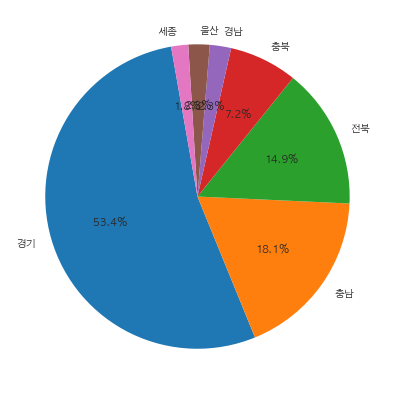

In [0]:
f, ax=plt.subplots(figsize=(7,7))
plt.pie(pie_data['ratio'], labels=pie_data['도/광역시'], autopct='%1.1f%%', shadow=False, startangle=100)
plt.show()

In [0]:
# 그룹별 가장 미세먼지가 가장 많이 나오는 시간대를 보고싶다
df3.groupby('도/광역시').max()['hour'].reset_index().rename(columns={'hour':'max hour'})

,도/광역시,max hour
0,경기,24
1,경남,10
2,대구,08
3,세종,08
4,울산,21
5,인천,10
6,전북,24
7,충남,24
8,충북,11


In [0]:
#그룹별 평균 count 값도 알고 싶다
df3.groupby('도/광역시').mean()['count'].reset_index().rename(columns={'count':'average count'})

,도/광역시,average count
0,경기,32.067797
1,경남,34.000000
2,대구,22.000000
3,세종,22.750000
4,울산,22.600000
5,인천,21.000000
6,전북,29.424242
7,충남,31.450000
8,충북,31.562500


### 결론
> - 미세먼지 배출이 많은 지역들 중, 50% 이상이 경기도에 속해있다
- 그 다음으로는 충남, 전북, 충북 순
- average count를 비교해봤을 때는 [경기, 충남, 전북, 충북] 간 큰 차이가 보이지 않는다.
- 경기, 전북, 충남, 이 세 지역 모두 미세먼지가 가장 많이 배출된 시간대는 밤 12시 이다.

## 2)-(1) 미세먼지가 나쁜 개수가 많은 시간대 찾기
- 초미세먼지가 35보다 큰 개수가 '많은' 시간대 
- 어디서 잘라야할까? 어디부터 많다고 할 수 있을지 고민,,,
- 자를 기준: 시간대 별 분포를 보자

In [0]:
# 초미세먼지가 35보다 큰 개수가 많은 시간대 출력
df4=df2.loc[df2['PM25']>35].groupby(['hour']).count()['id'].reset_index()
df4=df4.sort_values(by='hour', ascending=False)
df4.head()

,hour,id
23,24,1164
22,23,1089
21,22,1030
20,21,900
19,20,736


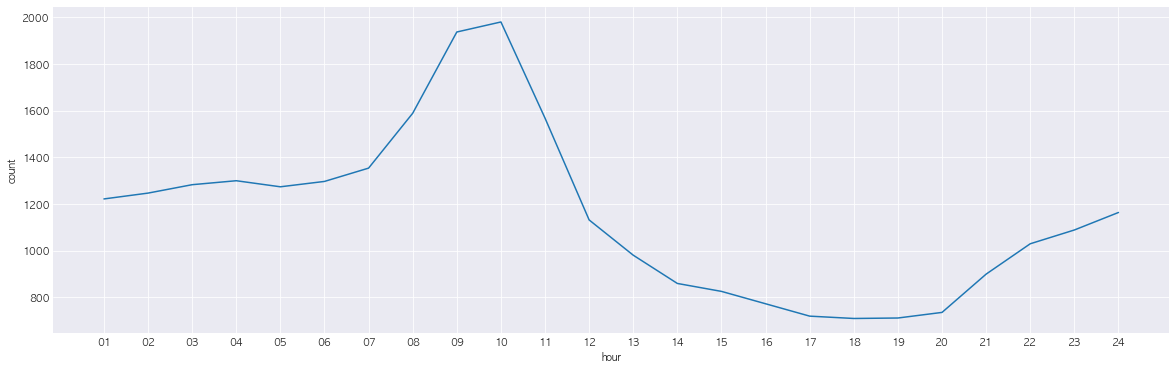

In [0]:
#어디서 잘라야할까? 어디부터 많다고 할 수 있을지 고민,,,
# 시간대별 분포를 보자
data=df4
data.rename(columns={'id':'count'},inplace=True)
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x='hour',y='count',data=data)
# 아침 7시 부터 11시까지가 많다! 

### 결론 
> 아침 7시 부터 11시까지가 많으며,
> 오후 2시 부터 저녁 9시까지 그 빈도수가 적다!!
- 미세먼지 나쁨 수준은 출퇴근 시간과 큰 관련이 없으며, 
- 새벽~아침까지 점진적으로 심해졌다가 
- 점심 이후에 해가 강해질 수록 완화되는 것으로 보인다